# PACKAGE IMPORTS

<div class="alert alert-block alert-info">
These libraries and tools collectively provide a comprehensive set of capabilities for handling data (pandas, numpy), manipulating text (re, nltk), and performing advanced natural language processing tasks (nltk). They are widely used in data science, machine learning, and text analytics projects due to their efficiency and versatility.








In [82]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# DATA LOADING

In [83]:
# Load the data
train_data = pd.read_csv('Data/processed/test.csv')
test_data = pd.read_csv('Data/processed/train.csv')

In [84]:
# Display the first few rows of the train dataset
(train_data.head())


,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


# Data Cleaning 

<div class="alert alert-block alert-info">
<b>Data cleaning</b>  refers to the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis. It involves several steps, including handling missing or incomplete data, correcting data format issues, removing duplicate records, and dealing with outliers or anomalies. 
</div>    
 

In [85]:
# Check for missing values
(train_data.isnull().sum())

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In [86]:
# Summary statistics of the dataset
(train_data.describe())


,headlines,description,content,url,category
count,2000,2000,2000,2000,2000
unique,2000,2000,2000,2000,5
top,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
freq,1,1,1,1,400


# Exploratory Data Analysis (EDA)

visualizing the distribution of the category column and analyzing the text data.  
EDA: Category Distribution

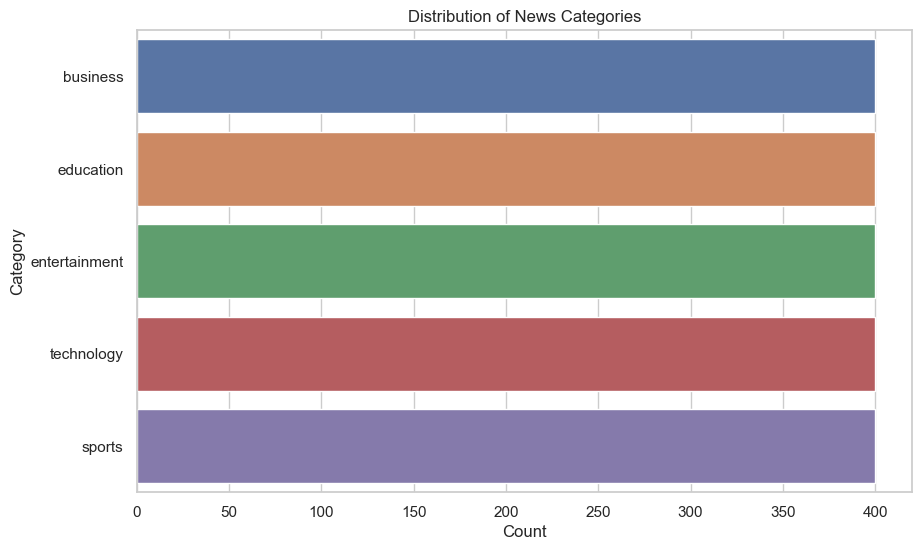

In [87]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=train_data, order=train_data['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


EDA: Text Length Analysis

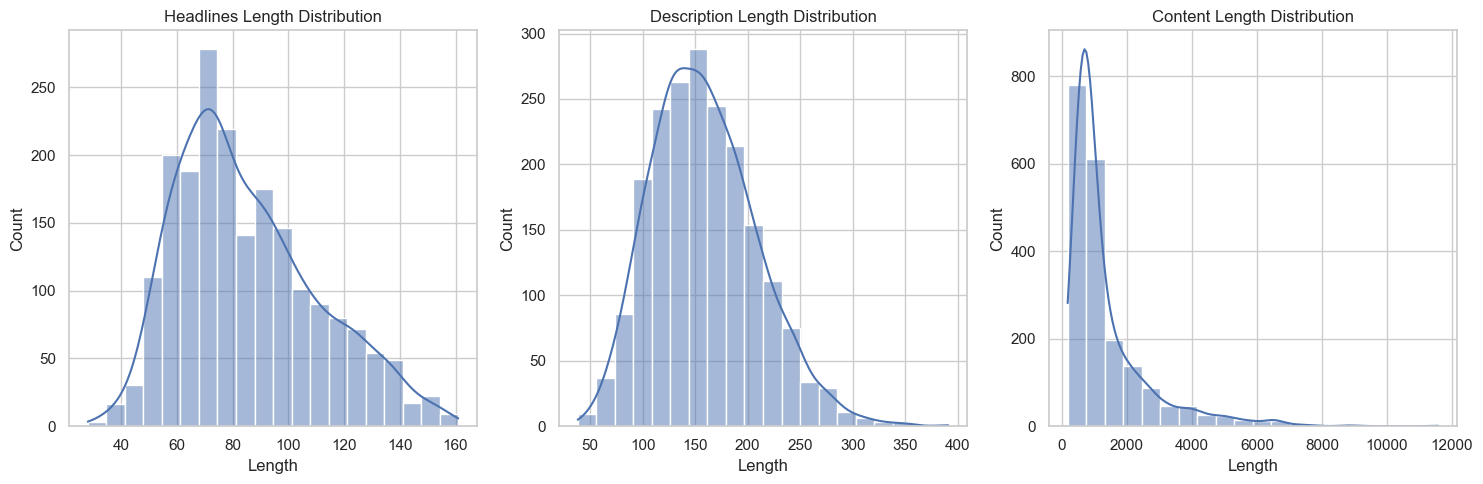

In [88]:
# Calculate the length of each text field
train_data['headlines_length'] = train_data['headlines'].apply(len)
train_data['description_length'] = train_data['description'].apply(len)
train_data['content_length'] = train_data['content'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_data['headlines_length'], bins=20, kde=True)
plt.title('Headlines Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 2)
sns.histplot(train_data['description_length'], bins=20, kde=True)
plt.title('Description Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 3)
sns.histplot(train_data['content_length'], bins=20, kde=True)
plt.title('Content Length Distribution')
plt.xlabel('Length')

plt.tight_layout()
plt.show()


# Implementing Data Cleaning and Preprocessing

<div class="alert alert-block alert-info">  
This section covers the process of data cleaning, which involves preparing text data for analysis by removing errors and inconsistencies. It includes downloading NLTK packages, loading datasets, and cleaning the text by removing noise, punctuation,converting to lowercase, and removing contractions. The text is then tokenized, stop words are removed, and words are stemmed and lemmatized. Finally, the processed text is reassembled into strings, with an option to save the cleaned datasets to CSV files.


In [89]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens)

# Apply cleaning function to the text fields
train_data['cleaned_headlines'] = train_data['headlines'].apply(clean_text)
train_data['cleaned_description'] = train_data['description'].apply(clean_text)
train_data['cleaned_content'] = train_data['content'].apply(clean_text)

# Display cleaned text
train_data[['cleaned_headlines', 'cleaned_description', 'cleaned_content']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sikha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sikha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_headlines,cleaned_description,cleaned_content
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam te...,sbi clerk prelim exam state bank indian sbi an...
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...
3,oneplu nord rs part new price cut here,new deal make oneplu nord easi purchas rs k,review oneplu nord g prais balanc combin featu...
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...


In [90]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens)

# Apply cleaning function to the text fields
train_data['cleaned_headlines'] = train_data['headlines'].apply(clean_text)
train_data['cleaned_description'] = train_data['description'].apply(clean_text)
train_data['cleaned_content'] = train_data['content'].apply(clean_text)

# Display cleaned text
train_data[['cleaned_headlines', 'cleaned_description', 'cleaned_content']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sikha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sikha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_headlines,cleaned_description,cleaned_content
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam te...,sbi clerk prelim exam state bank indian sbi an...
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...
3,oneplu nord rs part new price cut here,new deal make oneplu nord easi purchas rs k,review oneplu nord g prais balanc combin featu...
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...


Text Vectorization using TF-IDF

In [72]:
# Vectorize the cleaned text fields
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned content
X = tfidf_vectorizer.fit_transform(train_data['cleaned_content'])

# Extract the target variable
y = train_data['category']

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
cleaned_sample, X.shape, y.shape, X_train.shape, X_val.shape

(                                   cleaned_headlines  \
 0  nlc india win contract power suppli rajasthan ...   
 1  sbi clerk prelim exam date announc admit card ...   
 2  golden globe michel yeoh ferrel angela bassett...   
 3             oneplu nord rs part new price cut here   
 4  adani famili partner use opaqu fund invest sto...   
 
                                  cleaned_description  \
 0  stateown firm nlc india ltd nlcil monday said ...   
 1  sbi clerk prelim exam sbi clerk prelim exam te...   
 2  barbi top nomine year follow close oppenheim f...   
 3        new deal make oneplu nord easi purchas rs k   
 4  cite review file multipl tax haven intern adan...   
 
                                      cleaned_content  
 0  stateown firm nlc india ltd nlcil monday said ...  
 1  sbi clerk prelim exam state bank indian sbi an...  
 2  michel yeoh ferrel angela bassett amanda seyfr...  
 3  review oneplu nord g prais balanc combin featu...  
 4  million dollar invest public

Text Length Distribution by Category

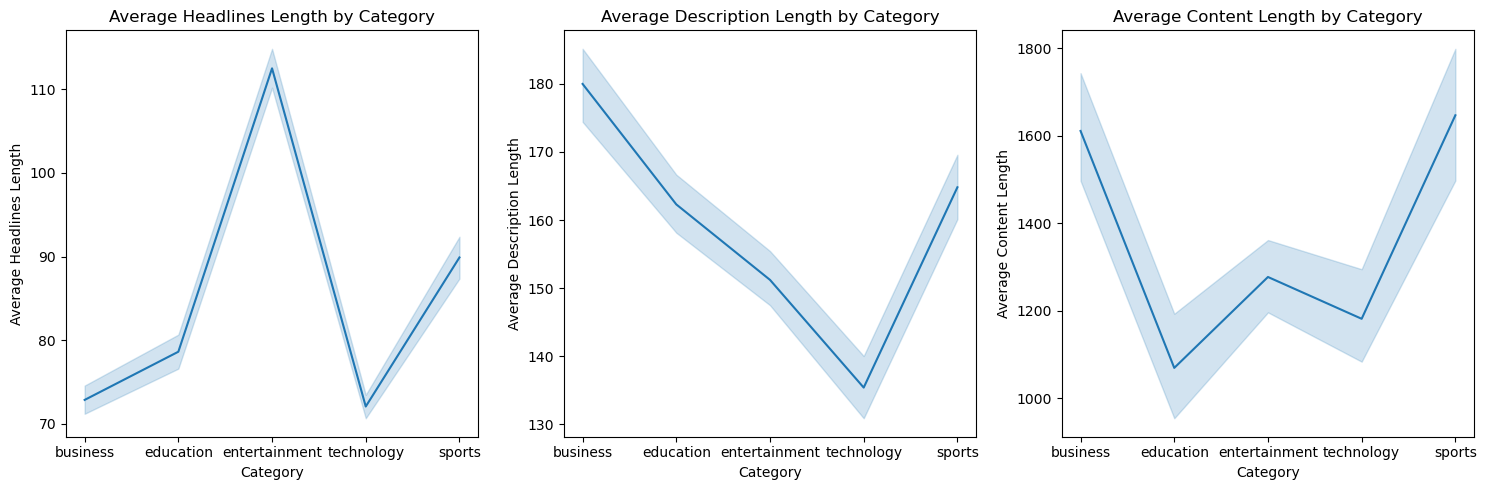

In [76]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=train_data, x='category', y='headlines_length', estimator='mean')
plt.title('Average Headlines Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Headlines Length')

plt.subplot(1, 3, 2)
sns.lineplot(data=train_data, x='category', y='description_length', estimator='mean')
plt.title('Average Description Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Description Length')

plt.subplot(1, 3, 3)
sns.lineplot(data=train_data, x='category', y='content_length', estimator='mean')
plt.title('Average Content Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Content Length')

plt.tight_layout()
plt.show()


Most Common Words in Each Category

In [77]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

categories = train_data['category'].unique()
for category in categories:
    print(f"Most common words in {category}:")
    top_words = get_top_n_words(train_data[train_data['category'] == category]['cleaned_content'], 10)
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("\n")


Most common words in business:
cent: 25.85797956169798
subscrib: 23.79329005873042
rs: 20.53596275517772
crore: 17.05985574701608
said: 15.748554838479821
bank: 14.226630350951567
india: 12.866716837659606
stori: 10.930268572354192
market: 10.33371812809815
compani: 10.278838905213567


Most common words in education:
student: 18.041342943802196
exam: 16.09939805230309
result: 13.144409031684463
univers: 12.84598584846583
institut: 12.048390321441822
subscrib: 12.038709630822499
read: 11.510634261208326
class: 11.416893253351926
iit: 11.113816854234164
educ: 10.922532014326464


Most common words in entertainment:
film: 20.69274791101496
latest: 16.375212883562376
news: 15.992247904356141
updat: 15.862343803971656
stori: 13.646227750597818
actor: 12.87821198990533
regist: 12.236727713434668
rs: 11.849633588924025
crore: 11.061458987649731
said: 10.517750178363036


Most common words in technology:
stori: 13.563391445029307
regist: 13.187967340567365
ai: 12.933171742312062
googl: 12.788

# Preprocessing Tasks for Classification

We have already cleaned the text data. We will now convert text data into numerical representations using TF-IDF vectorization. This step was covered previously, so we will move to model training.

#  Model Training

>Logistic Regression  
 
 >Naive Bayes
 
 >Support Vector Machine (SVM)
 
 >Random Forest
 
 >Neural Network (MLPClassifier)

In [78]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    results[model_name] = {'accuracy': accuracy, 'f1_score': f1, 'classification_report': classification_report(y_val, y_pred)}

In [80]:
# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print(f"Classification Report:\n{metrics['classification_report']}\n")


Model: Logistic Regression
Accuracy: 0.9725
F1 Score: 0.9724346889897368
Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.96      0.96        73
    education       0.99      0.99      0.99        80
entertainment       0.99      0.98      0.98        81
       sports       0.98      1.00      0.99        86
   technology       0.95      0.94      0.94        80

     accuracy                           0.97       400
    macro avg       0.97      0.97      0.97       400
 weighted avg       0.97      0.97      0.97       400


Model: Naive Bayes
Accuracy: 0.98
F1 Score: 0.9799168545138645
Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.96      0.97        73
    education       0.99      1.00      0.99        80
entertainment       0.99      0.99      0.99        81
       sports       0.99      1.00      0.99        86
   technology       0.96      0.95      0.9

# MODEL ANALYSIS

Logistic Regression performs very well with high accuracy and F1 score. It shows strong performance across all classes, particularly notable for its balanced precision and recall.

Naive Bayes achieves the highest accuracy and F1 score among all models evaluated. It demonstrates excellent precision and recall across all classes, indicating robust performance in classifying news articles.

SVM shows strong performance with high accuracy and F1 score. It performs consistently well across most classes, although slightly lower than Naive Bayes in overall metrics.

 Random Forest performs well with decent accuracy and F1 score. It demonstrates good performance in some classes but shows slightly lower metrics compared to Naive Bayes and Logistic Regression.

Naive Bayes stands out as the top-performing model in this evaluation, achieving the highest accuracy and F1 score. It consistently shows strong precision and recall across all classes, making it the recommended choice for this classification task based on the provided data and evaluation results.

# MODEL PERFORMANCE

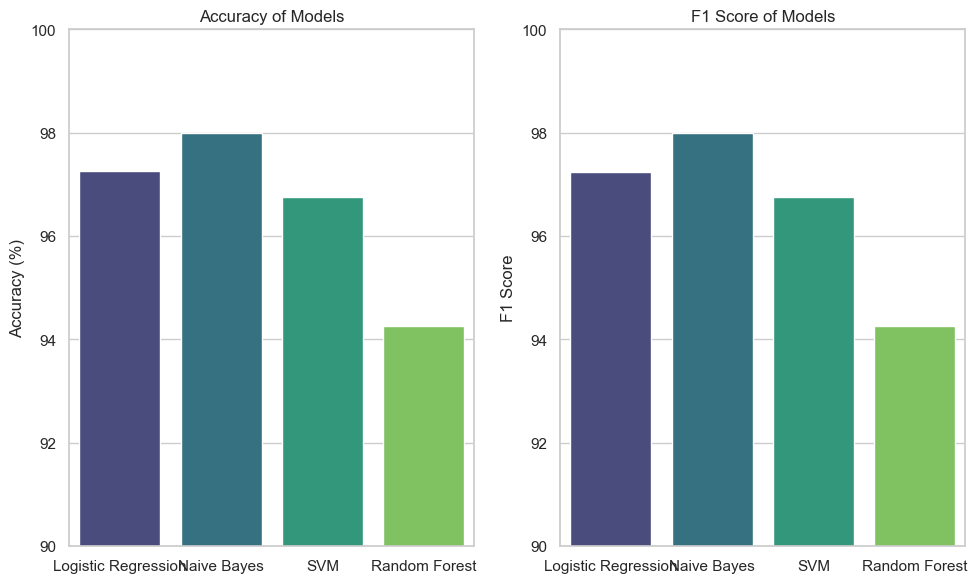

In [81]:

# Data for models
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest']
accuracy = [97.25, 98.00, 96.75, 94.25]
f1_score = [97.24, 97.99, 96.76, 94.25]

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Plotting accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.ylim([90, 100])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Models')

# Plotting F1 score
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=f1_score, palette='viridis')
plt.ylim([90, 100])
plt.ylabel('F1 Score')
plt.title('F1 Score of Models')

# Adjust layout and display plot
plt.tight_layout()
plt.show()
